<a href="https://colab.research.google.com/github/DeathStroXX/CVImageApp/blob/main/new_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.utils.mobile_optimizer as mobile_optimizer


In [2]:
!pip install rawpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 37.3 MB/s eta 0:00:00


In [2]:

from IPython import get_ipython
from IPython.display import display
import torch
import torch.nn as nn
import torch.utils.mobile_optimizer as mobile_optimizer
from PIL import Image
import numpy as np
import rawpy
from google.colab import drive
import rawpy #Import rawpy
import matplotlib.pyplot as plt


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def gamma_compression_torch(image):
        """Converts from linear to gamma space."""
        return torch.clamp(image, min=1e-8) ** (1.0 / 2.2)
def tonemap_torch(image):
        """Simple S-curved global tonemap."""
        return (3 * (image**2)) - (2 * (image**3))

In [4]:
class CustomModel(nn.Module):

    def __init__(self):
        super(CustomModel, self).__init__()
        # self.gamma = 0.5
        # self.cte = 2
        # self.contrast_factor = 1.5  # Example contrast adjustment factor

    def forward(self, pixel_tensor):
        print("Initial pixel_tensor:")
        print("  Shape:", pixel_tensor.shape)
        print("  Data Type:", pixel_tensor.dtype)
        print("  Min:", pixel_tensor.min())
        print("  Max:", pixel_tensor.max())
        # Normalize image to [0, 1] range
        pixel_tensor = pixel_tensor.to(torch.float32)
        print("\npixel_tensor after .to(torch.float32):")
        print("  Data Type:", pixel_tensor.dtype)
        print("  Min:", pixel_tensor.min())
        print("  Max:", pixel_tensor.max())
        if pixel_tensor.max() > 1:
            pixel_tensor = pixel_tensor / 255.0




        # Apply gamma compression and tonemapping using PyTorch functions
        pixel_tensor = gamma_compression_torch(pixel_tensor)
        print("\npixel_tensor after gamma_compression_torch:")
        print("  Data Type:", pixel_tensor.dtype)
        print("  Min:", pixel_tensor.min())
        print("  Max:", pixel_tensor.max())
        # pixel_tensor = tonemap_torch(pixel_tensor)

        # Denormalize to [0, 255] and convert to uint8

        pixel_tensor = torch.clip(pixel_tensor * 255, 0, 255)


        pixel_tensor = pixel_tensor.to(torch.uint8)


        return pixel_tensor


In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/ComputerVision/DataSet/R50Pro5G/IMG_2024_12_27_20_35_07_405.dng" # Replace with your image path
# Open the DNG file using rawpy
try:
    with rawpy.imread(image_path) as raw:
        # Postprocess the image to convert it to RGB
        img_rgb = raw.postprocess()
except rawpy._rawpy.LibRawError as e:
    print(f"Error opening or processing raw image: {e}")
    exit()

In [5]:
npy_file_path = "/content/drive/MyDrive/Colab Notebooks/ComputerVision/inputArray.npy"
try:
    img_np = np.load(npy_file_path)
    print(f"Numpy shape: {img_np.shape}")
except FileNotFoundError:
    print(f"Error: .npy file not found at {npy_file_path}")
    exit()
except Exception as e:
  print(f"An error occured: {e}")
  exit()
pixel_tensor = torch.from_numpy(img_np).permute(2, 0, 1)
pixel_tensor = pixel_tensor.unsqueeze(0)
print(pixel_tensor.shape)

An error occured: Cannot load file containing pickled data when allow_pickle=False


NameError: name 'img_np' is not defined

In [ ]:
# Convert to NumPy array and then to PyTorch tensor
img_np = np.array(img_rgb)
pixel_tensor = torch.from_numpy(img_np).permute(2, 0, 1) #HWC to CHW
pixel_tensor = pixel_tensor.unsqueeze(0)
print(pixel_tensor.shape)

torch.Size([1, 3, 1728, 2304])


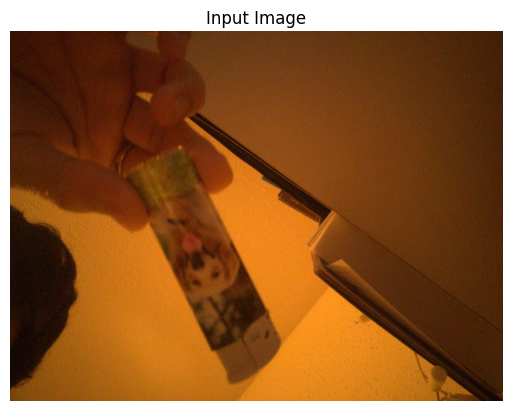

In [ ]:
input_np = img_rgb

# Display the input image using matplotlib
plt.imshow(input_np)
plt.title("Input Image")
plt.axis('off')
plt.show()

In [ ]:
model = CustomModel()
output = model(pixel_tensor)

print("Output Tensor Shape:", output.shape)
print("Output Tensor Data Type:", output.dtype)

Initial pixel_tensor:
  Shape: torch.Size([1, 3, 1728, 2304])
  Data Type: torch.uint8
  Min: tensor(0, dtype=torch.uint8)
  Max: tensor(255, dtype=torch.uint8)

pixel_tensor after .to(torch.float32):
  Data Type: torch.float32
  Min: tensor(0.)
  Max: tensor(255.)

pixel_tensor after gamma_compression_torch:
  Data Type: torch.float32
  Min: tensor(0.0002)
  Max: tensor(1.)
Output Tensor Shape: torch.Size([1, 3, 1728, 2304])
Output Tensor Data Type: torch.uint32


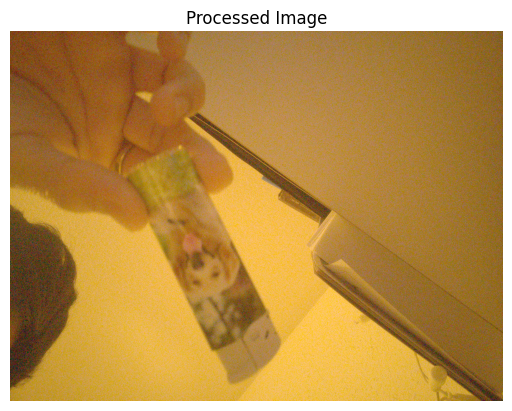

In [ ]:
# Convert the processed tensor back to a NumPy array for display
output_np = output.squeeze().permute(1, 2, 0).cpu().numpy()

# Display the image using matplotlib
plt.imshow(output_np)
plt.title("Processed Image")
plt.axis('off')  # Hide the axes
plt.show()

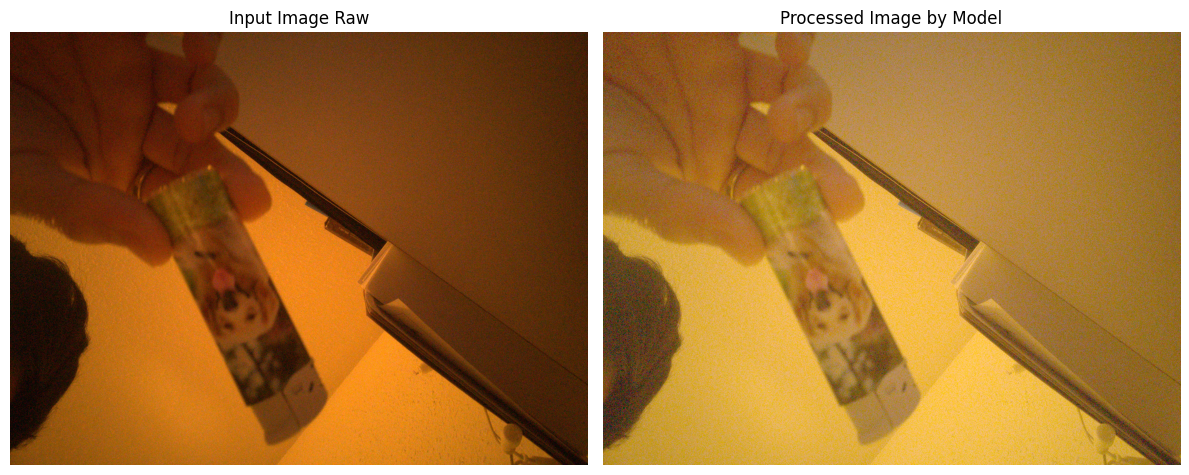

In [ ]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Display the input image on the left
axes[0].imshow(img_rgb)
axes[0].set_title("Input Image Raw")
axes[0].axis('off')
# Display the processed image on the right
axes[1].imshow(output_np)
axes[1].set_title("Processed Image by Model")
axes[1].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Initialize the new model
model = CustomModel()

# Test with a dummy image
dummy_img = torch.rand(1, 3, 1728, 2304)  # Batch of 1 RGB image (1728x2304)
output = model(dummy_img)

# Print output to verify shape and type
print(output.shape)  # Should be (1, 3, 1728, 2304)
print(output.dtype)  # Should be torch.uint8
print()

Initial pixel_tensor:
  Shape: torch.Size([1, 3, 1728, 2304])
  Data Type: torch.float32
  Min: tensor(0.)
  Max: tensor(1.0000)

pixel_tensor after .to(torch.float32):
  Data Type: torch.float32
  Min: tensor(0.)
  Max: tensor(1.0000)

pixel_tensor after gamma_compression_torch:
  Data Type: torch.float32
  Min: tensor(0.0002)
  Max: tensor(1.0000)
torch.Size([1, 3, 1728, 2304])
torch.uint32



In [ ]:
# Initialize the new model
model = CustomModel()

# Test with a dummy image
dummy_img = torch.rand(1, 3, 1728, 2304)  # Batch of 1 RGB image (1728x2304)
output = model(dummy_img)

# Print output to verify shape and type
print(output.shape)  # Should be (1, 3, 1728, 2304)
print(output.dtype)  # Should be torch.uint8



Initial pixel_tensor:
  Shape: torch.Size([1, 3, 1728, 2304])
  Data Type: torch.float32
  Min: tensor(1.1921e-07)
  Max: tensor(1.0000)

pixel_tensor after .to(torch.float32):
  Data Type: torch.float32
  Min: tensor(1.1921e-07)
  Max: tensor(1.0000)

pixel_tensor after gamma_compression_torch:
  Data Type: torch.float32
  Min: tensor(0.0007)
  Max: tensor(1.0000)
torch.Size([1, 3, 1728, 2304])
torch.uint32


In [ ]:


# Trace the model
traced_model = torch.jit.trace(model, dummy_img)

# Set the path same as in your previous code
remoteDesktopPath = "/content/drive/MyDrive/Colab Notebooks/ComputerVision/simple_model.pt"

# Optimize for mobile
traced_model_optimized = mobile_optimizer.optimize_for_mobile(traced_model)

# Save the optimized model
traced_model_optimized._save_for_lite_interpreter(remoteDesktopPath)


Initial pixel_tensor:
  Shape: torch.Size([1, 3, 1728, 2304])
  Data Type: torch.float32
  Min: tensor(1.1921e-07)
  Max: tensor(1.0000)

pixel_tensor after .to(torch.float32):
  Data Type: torch.float32
  Min: tensor(1.1921e-07)
  Max: tensor(1.0000)


<ipython-input-12-90ab729856ad>:21: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if pixel_tensor.max() > 1:



pixel_tensor after gamma_compression_torch:
  Data Type: torch.float32
  Min: tensor(0.0007)
  Max: tensor(1.0000)
Initial pixel_tensor:
  Shape: torch.Size([1, 3, 1728, 2304])
  Data Type: torch.float32
  Min: tensor(1.1921e-07)
  Max: tensor(1.0000)

pixel_tensor after .to(torch.float32):
  Data Type: torch.float32
  Min: tensor(1.1921e-07)
  Max: tensor(1.0000)

pixel_tensor after gamma_compression_torch:
  Data Type: torch.float32
  Min: tensor(0.0007)
  Max: tensor(1.0000)
Initial pixel_tensor:
  Shape: torch.Size([1, 3, 1728, 2304])
  Data Type: torch.float32
  Min: tensor(1.1921e-07)
  Max: tensor(1.0000)

pixel_tensor after .to(torch.float32):
  Data Type: torch.float32
  Min: tensor(1.1921e-07)
  Max: tensor(1.0000)

pixel_tensor after gamma_compression_torch:
  Data Type: torch.float32
  Min: tensor(0.0007)
  Max: tensor(1.0000)
